In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import glob

import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset,DataLoader
import cv2
import pytorch_lightning as pl
import torchvision.transforms as transforms
import torch.optim as optim

## Data Pre-Processing

In [13]:
# Arborio = glob.glob(f"Data/Arborio/*.jpg")
# Basmati = glob.glob(f"Data/Basmati/*.jpg")
# Ipsala = glob.glob(f"Data/Ipsala/*.jpg")
# Jasmine = glob.glob(f"Data/Jasmine/*.jpg")
# Karacadag = glob.glob(f"Data/Karacadag/*.jpg")

In [14]:
Arborio = list(glob.glob(f"Data/Arborio/*.jpg"))[:500]
Basmati = list(glob.glob(f"Data/Basmati/*.jpg"))[:500]
Ipsala = list(glob.glob(f"Data/Ipsala/*.jpg"))[:500]
Jasmine = list(glob.glob(f"Data/Jasmine/*.jpg"))[:500]
Karacadag = list(glob.glob(f"Data/Karacadag/*.jpg"))[:500]

In [15]:
data1 = {
    "mask_id": Arborio,
    "mask":"Arborio"
}
data2 = {
    "mask_id": Basmati,
    "mask":"Basmati"
}
data3 = {
    "mask_id": Ipsala,
    "mask":"Ipsala"
}
data4 = {
    "mask_id": Jasmine,
    "mask":"Jasmine"
}
data5 = {
    "mask_id": Karacadag,
    "mask":"Karacadag"
}

# a dataframe with the path and labels
Arborio = pd.DataFrame(data1)
Basmati = pd.DataFrame(data2)
Ipsala = pd.DataFrame(data3)
Jasmine = pd.DataFrame(data4)
Karacadag = pd.DataFrame(data5)

#combining the five datasets
df = pd.concat([Arborio,Basmati,Ipsala,Jasmine,Karacadag],ignore_index= True)
df

,mask_id,mask
0,Data/Arborio/Arborio (1821).jpg,Arborio
1,Data/Arborio/Arborio (1061).jpg,Arborio
2,Data/Arborio/Arborio (14939).jpg,Arborio
3,Data/Arborio/Arborio (7942).jpg,Arborio
4,Data/Arborio/Arborio (10148).jpg,Arborio
5,Data/Arborio/Arborio (8324).jpg,Arborio
6,Data/Arborio/Arborio (12081).jpg,Arborio
7,Data/Arborio/Arborio (1727).jpg,Arborio
8,Data/Arborio/Arborio (244).jpg,Arborio
9,Data/Arborio/Arborio (2149).jpg,Arborio


In [16]:
#define the labels to the foods

def label(x):
    if x == "Arborio":
        return 0
    if x == "Basmati":
        return 1
    if x == "Ipsala":
        return 2
    if x == "Jasmine":
        return 3
    if x == "Karacadag":
        return 4

In [17]:
# encoding the label numerically

df["mask"] = df["mask"].apply(label)
df

,mask_id,mask
0,Data/Arborio/Arborio (1821).jpg,0
1,Data/Arborio/Arborio (1061).jpg,0
2,Data/Arborio/Arborio (14939).jpg,0
3,Data/Arborio/Arborio (7942).jpg,0
4,Data/Arborio/Arborio (10148).jpg,0
5,Data/Arborio/Arborio (8324).jpg,0
6,Data/Arborio/Arborio (12081).jpg,0
7,Data/Arborio/Arborio (1727).jpg,0
8,Data/Arborio/Arborio (244).jpg,0
9,Data/Arborio/Arborio (2149).jpg,0


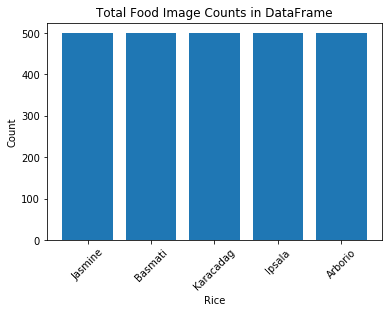

In [18]:
# Count the occurrences of each label
label_counts = df['mask'].value_counts()

# Custom labels for each value
custom_labels = {0: 'Arborio', 1: 'Basmati', 2: 'Ipsala', 3: 'Jasmine', 4: 'Karacadag'}

# Map labels to custom labels
label_counts.index = label_counts.index.map(custom_labels)

# Plotting
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Rice')
plt.ylabel('Count')
plt.title('Total Food Image Counts in DataFrame')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

In [19]:
# Split the data as train and test

X  = df["mask_id"]
y = df["mask"]
x_train , x_test , y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42 ,)
x_train , x_val , y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

In [20]:
print(y_train.shape, y_test.shape, y_val.shape )

(1500,) (625,) (375,)


In [21]:
# Assuming you have a DataFrame with a single unnamed column
count_label_0 = len(y_test[y_test.iloc[:] == 4])

print("Number of rows with value 0:", count_label_0)

Number of rows with value 0: 119


In [22]:
x_train.values

array(['Data/Arborio/Arborio (1068).jpg',
       'Data/Karacadag/Karacadag (12764).jpg',
       'Data/Arborio/Arborio (4435).jpg', ...,
       'Data/Basmati/basmati (10735).jpg',
       'Data/Arborio/Arborio (6272).jpg',
       'Data/Arborio/Arborio (8829).jpg'], dtype=object)

In [28]:
# # Find the mean and std of the testing, training and validation data

from PIL import Image

# Define a custom dataset class to load and preprocess images
class CustomDataset(Dataset):
    def __init__(self, file_paths, transform=None):
        self.file_paths = file_paths
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        image = Image.open(self.file_paths[idx])
        if self.transform:
            image = self.transform(image)
        return image

batch_size = len(x_val)

# Define the transformation without normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create a custom dataset
custom_dataset = CustomDataset(x_val.values, transform=transform)

# Create a DataLoader for the dataset
loader = DataLoader(custom_dataset, batch_size=batch_size)

# for parallel work but some times this give error if the memory is not sufficient
#loader = DataLoader(custom_dataset, batch_size=batch_size, num_workers=1)


# Calculate mean and std
data = next(iter(loader))
mean = data.mean()
std = data.std()

print("Mean:", mean)
print("Std:", std)

Mean: tensor(0.1197)
Std: tensor(0.2984)


In [12]:
# Training   = mean:0.1198 std:0.2984 
# Testing    = mean:0.1209 std:0.2993 
# Validation = mean:0.1197 std:0.2984

In [29]:
# Data augmentation and normalization for training
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(0.1198, 0.2984)  # Add normalization
])

# Data augmentation and normalization for testing
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(0.1209, 0.2993)  # Add normalization
])

# Data augmentation and normalization for validation
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(0.1197, 0.2984)  # Add normalization
])

In [30]:
from PIL import Image

class MaskDataset(torch.utils.data.Dataset):
    def __init__(self,image,targets = None,transform=None):
        self.image = image
        self.targets = targets
        self.transform = transform 
        
    def __len__(self):
        return len(self.image)
    
    def __getitem__(self,index):
        path = self.image[index]
        image = Image.open(path)
        img_transformed = self.transform(image)
        
        return img_transformed , torch.tensor(self.targets[index])

In [31]:
train_dataset = MaskDataset(
                x_train.values,
                y_train.values,
                transform=train_transforms
)

test_dataset = MaskDataset(
                    x_test.values,
                    y_test.values,
                    transform=test_transforms
)

validation_dataset = MaskDataset(
                    x_val.values,
                    y_val.values,
                    transform=val_transforms
)

In [32]:
batch_size = 64

In [33]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size=batch_size, shuffle=False)

In [34]:
print(len(train_dataset), len(train_loader))

1500 24


In [35]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

## Model

In [36]:
neural_network = torchvision.models.resnet50(pretrained= True)
neural_network.fc = torch.nn.Linear(2048,5)# changing the number of output features to 5

In [37]:
class Rice_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.neural_net = neural_network
        
    def forward(self,x):
        return self.neural_net(x)

In [38]:
model = Rice_Model().to()
model.train()

Rice_Model(
  (neural_net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [39]:
# set Loss function and optimizer

optimizer = optim.Adam(params = model.parameters(),lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [40]:
epochs = 10
train_losses = []
val_losses = []


# This is for the early stopping

best_val_loss = float('inf')  # Set to positive infinity initially
patience = 3  # Number of epochs with no improvement after which training will be stopped
counter = 0  # Counter to track the number of epochs with no improvement


for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_loader:
        data = data.to()
        label = label.to()
        
        output = model(data)
        loss = criterion(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1) == label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
    
    train_losses.append(epoch_loss)  # Store the training loss for the epoch
    
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
    
    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to()
            label = label.to()
            
            val_output = model(data)
            val_loss = criterion(val_output,label)
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_losses.append(epoch_val_loss)  # Store the validation loss for the epoch

        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
        
        
        # Early stopping check
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping after {epoch+1} epochs.')
                break
        

/home/user8/.local/lib/python3.6/site-packages/torch/autograd/__init__.py:156: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


Epoch : 1, train accuracy : 0.9019717574119568, train loss : 0.3754166066646576
Epoch : 1, val_accuracy : 0.9678976535797119, val_loss : 0.08990228176116943
Epoch : 2, train accuracy : 0.984375, train loss : 0.042566929012537
Epoch : 2, val_accuracy : 0.9731061458587646, val_loss : 0.09465193748474121
Epoch : 3, train accuracy : 0.9843750596046448, train loss : 0.055500708520412445
Epoch : 3, val_accuracy : 0.9843750596046448, val_loss : 0.056550778448581696
Epoch : 4, train accuracy : 0.9928386211395264, train loss : 0.022675981745123863
Epoch : 4, val_accuracy : 0.9947917461395264, val_loss : 0.029646607115864754
Epoch : 5, train accuracy : 0.9960938692092896, train loss : 0.01356550958007574
Epoch : 5, val_accuracy : 0.9921875596046448, val_loss : 0.030124522745609283
Epoch : 6, train accuracy : 0.997395932674408, train loss : 0.0108567513525486
Epoch : 6, val_accuracy : 0.9921875596046448, val_loss : 0.03424450755119324
Epoch : 7, train accuracy : 0.9946057796478271, train loss : 0

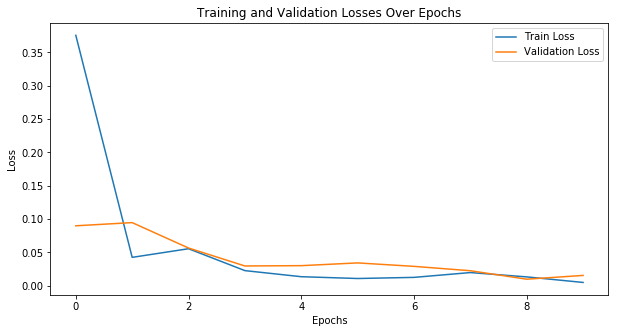

In [41]:
# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.legend()
plt.show()

### Model Performance 

In [73]:
model_name = 'resnet50'

In [42]:
# Check the performance in each class

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the model to evaluation mode
model.eval()

# Lists to store true labels and predicted labels for the validation set
true_labels = []
predicted_labels = []


with torch.no_grad():
    for data, label  in test_loader:
    
        data = data.to()
        label = label.to()
        
        val_output = model(data)
        predicted_labels.extend(val_output.argmax(dim=1).cpu().numpy())
        true_labels.extend(label.cpu().numpy())

In [75]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from tabulate import tabulate

def get_class_name(class_idx):
    class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
    return class_names[class_idx]

# Assuming you have true_labels and predicted_labels
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, labels=[0, 1, 2, 3, 4])

# Create a list of dictionaries for each class with formatted values
class_metrics_list = [
    {'Class': get_class_name(i), 'Precision': f'{p:.4f}', 'Recall': f'{r:.4f}', 'F1-Score': f'{f1:.4f}'}
    for i, (p, r, f1) in enumerate(zip(precision, recall, f1))
]

# Format the accuracy to display only four decimal places
formatted_accuracy = "{:.4f}".format(accuracy)

# Print the formatted accuracy
print("CNN model: {}\n".format(model_name))

# Print the formatted accuracy
print("Testing Accuracy: {}".format(formatted_accuracy))

# Print the table using tabulate
print(tabulate(class_metrics_list, headers='keys', tablefmt='pretty'))

CNN model: resnet50

Testing Accuracy: 0.9984
+-----------+-----------+--------+----------+
|   Class   | Precision | Recall | F1-Score |
+-----------+-----------+--------+----------+
|  Arborio  |  1.0000   | 0.9923 |  0.9961  |
|  Basmati  |  1.0000   | 1.0000 |  1.0000  |
|  Ipsala   |  1.0000   | 1.0000 |  1.0000  |
|  Jasmine  |  0.9929   | 1.0000 |  0.9964  |
| Karacadag |  1.0000   | 1.0000 |  1.0000  |
+-----------+-----------+--------+----------+


In [70]:
# Assuming you have true_labels and predicted_labels
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='micro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Create a dictionary with your metrics
metrics_dict = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Macro': [accuracy, precision, recall, f1],
    'Micro': [accuracy, precision_micro, recall_micro, f1_micro],
    'Weighted': [accuracy, precision_weighted, recall_weighted, f1_weighted],
}

# Transpose the structure for better formatting
transposed_metrics_dict = {
    'Parameter': metrics_dict['Metric'],
    'Macro': [f'{value:.4f}' for value in metrics_dict['Macro']],
    'Micro': [f'{value:.4f}' for value in metrics_dict['Micro']],
    'Weighted': [f'{value:.4f}' for value in metrics_dict['Weighted']],
}

# Print the table using tabulate
print(tabulate(transposed_metrics_dict, headers='keys', tablefmt='pretty'))

+-----------+--------+--------+----------+
| Parameter | Macro  | Micro  | Weighted |
+-----------+--------+--------+----------+
| Accuracy  | 0.9984 | 0.9984 |  0.9984  |
| Precision | 0.9986 | 0.9984 |  0.9984  |
|  Recall   | 0.9985 | 0.9984 |  0.9984  |
| F1-Score  | 0.9985 | 0.9984 |  0.9984  |
+-----------+--------+--------+----------+


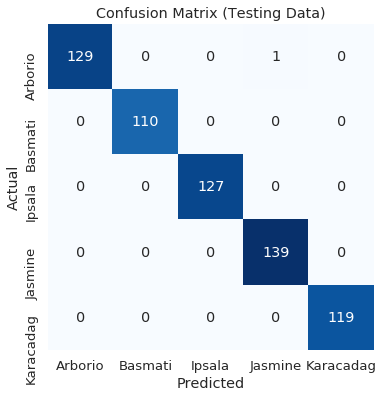

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Confusion Matrix (Testing or Unseen Data)')
plt.title('Confusion Matrix (Testing Data)')
plt.show()